In [1]:
import csv
import math
import random
from matplotlib import pyplot as plt
import numpy.polynomial

In [2]:
# Random Gen
val_x = []
val_y = []
rand = random.randrange
for x in range(0,21,4):
    val_x.append(x)
    val_y.append(rand(10))
arr_x = numpy.array(val_x)
arr_y = numpy.array(val_y)

print(arr_x)
print(arr_y)

[ 0  4  8 12 16 20]
[2 7 0 6 9 8]


In [3]:
# fit
polyfit = numpy.polynomial.Polynomial.fit
f_fit, ret2 = numpy.polynomial.Polynomial.fit(arr_x, arr_y, deg=4, full= True)
f_der = f_fit.deriv(1)

print(f_fit)
print(f_der)
print(ret2)


2.0703124999999933 + 3.9351851851851865 x**1 + 24.0885416666667 x**2 -
1.1574074074074137 x**3 - 21.15885416666669 x**4
0.39351851851851866 + 4.81770833333334 x**1 - 0.3472222222222241 x**2 -
8.463541666666677 x**3
[array([12.44444444]), 5, array([1.61159177, 1.3908482 , 0.62590918, 0.25601033, 0.10492694]), 1.3322676295501878e-15]


<class 'numpy.ndarray'>


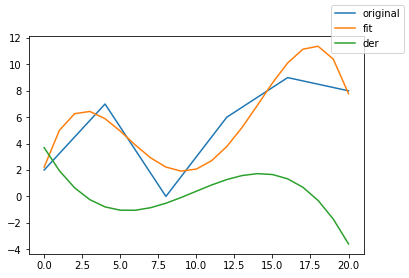

In [4]:
# visualize
fig, ax = plt.subplots(1)
x_range = range(0,21)
ax.plot(arr_x, arr_y, label= 'original')
ax.plot(x_range, list(f_fit(x) for x in x_range), label= 'fit')
ax.plot(x_range, list(f_der(x) for x in x_range), label= 'der')
# ax.plot(arr_y, arr_x, label = 'another')
fig.legend()
print(type(arr_x))

In [5]:
path = './output@2021-08-31_18.48_reordered'

In [6]:

def read_csv(csvpath) -> dict:
    re = {
        'first_label' : '',
        'second_label' : '',
        'first_axis' : [],
        'second_axis' : [],
        'values' : {}
    }  
    with open(csvpath, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        first_row = next(reader)
        [re['second_label'], re['first_label']] = first_row[0].split('|')
        re['first_axis'] = list(float(str) for str in first_row[1:])
        for row in reader:
            re['second_axis'].append(row[0])
            re['values'][row[0]] = list(float(str) for str in row[1:])
    return re


result = read_csv(path + '.csv')

In [7]:
# Receive: see def
# Return: (x_range, y_range) for max
def get_max_series(x_range: numpy.ndarray, y_range: numpy.ndarray, offset: int, left_expand: int = 0, right_expand:int = 0) -> tuple:
    start = 0
    end = len(x_range)
    arr_x = numpy.array(x_range)
    arr_y = numpy.array(y_range)
    if offset > end:
        return None
    max_sum = arr_x[start:offset].sum()
    max_sum_range = (start, offset)
    for i in range(end - offset):
        if i == 0:
            continue
        sum_val = arr_y[i:i+offset].sum()
        if max_sum < sum_val:
            max_sum = sum_val
            max_sum_range = (i, i + offset)
    lower_bound, upper_bound = (max_sum_range)
    lower_bound, upper_bound = (max(lower_bound - left_expand , start),min(upper_bound + right_expand, end))
    return (x_range[lower_bound:upper_bound], y_range[lower_bound:upper_bound])

# derivative and find roots
def simple_find_bound(func: numpy.polynomial.Polynomial, x_range: tuple) -> tuple:
    f_der = func.deriv(1)
    roots = f_der.roots()
    max_root = None
    x_min, x_max = x_range
    # print(roots)
    # print(list(root.dtype.kind for root in roots))
    for root_item in roots:
        root = numpy.real_if_close(root_item)
        if root.dtype.kind != 'c' and x_min < root < x_max:
            if max_root is None or func(root) > func(max_root):
                max_root = root
    if max_root is not None:
        return (max_root, func(max_root))
    else:
        val_x_min, val_x_max = func(x_min), func(x_max)
        if val_x_max > val_x_min:
            return (x_max, val_x_max)
        else:
            return (x_min, val_x_min)

simple_find_bound(numpy.polynomial.Polynomial([1,1,0,1]),(0,100))

(100, 1000101.0)

7200
[0]6.962006859963589 - 0.3087659720880976 x**1 + 0.016916075147059468 x**2 +
0.19073707543362808 x**3 - 0.34699266923035554 x**4 -
0.466579047600663 x**5 + 0.7277791201863124 x**6 +
0.4593423684451736 x**7 - 0.5801513299196831 x**8
[1]7.294061161895875 - 0.043436539854286936 x**1 -
0.021487417308015715 x**2 + 0.006753596628741101 x**3 +
0.009818790691714414 x**4 + 0.0023428792308971737 x**5 -
0.014953158784375423 x**6 - 0.0021272723763431567 x**7 +
0.005661455733365114 x**8
[2]7.324941467653296 - 0.012990662217490657 x**1 - 0.00931150755074855 x**2 +
0.0032604088759920703 x**3 + 0.016633178933493205 x**4 -
0.005164791346000578 x**5 - 0.03160820095466174 x**6 +
0.0050540148324441266 x**7 + 0.0174332741271797 x**8
[3]7.326470874088933 - 0.012006683909174476 x**1 -
0.007919606186561748 x**2 + 0.01825686995620892 x**3 +
0.0072636182718127575 x**4 - 0.04029811839597385 x**5 +
0.002919457016743101 x**6 + 0.025799088421922016 x**7 -
0.009239716273903886 x**8
[4]7.324524437304223 - 0.0127

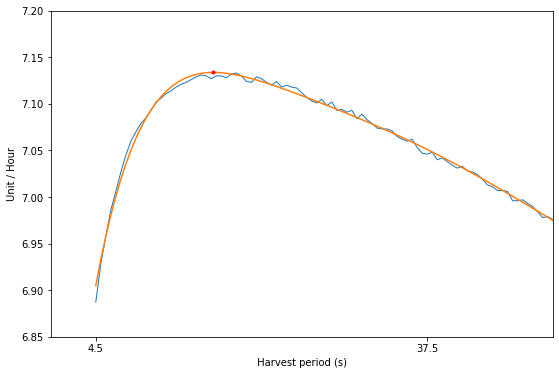

In [8]:

# ployfit & plot
ployfit = numpy.polynomial.Polynomial.fit
to_array = numpy.array

arr_x = to_array(result['first_axis'])
# arr_x *= 20
fit_funcs = []

fig, ax = plt.subplots()
#fig.set_dpi(15)


fig.set_size_inches(9,6)
fig.set_facecolor('white')

start = 0
end = len(arr_x)
start_val = end
end_val = 0
print(len(arr_x))

max_points = []

black_list =list(range(1,26))

index = -1
for val in result['second_axis']:
    index += 1
    if index in black_list:
        continue
    arr_y = to_array(result['values'][val])
    
    cut_x, cut_y = get_max_series(x_range= arr_x, y_range= arr_y, offset= 26, left_expand= 15 + index, right_expand=150 + 20 * index)
    # print((cut_x,cut_y))
    if cut_x[0] < start_val:
        start_val = cut_x[0]
    if cut_x[-1] > end_val:
        end_val = cut_x[-1]

    fit_func = ployfit(cut_x, cut_y, deg= 8)
    print('[' + str(index) + ']' + str(fit_func))
    point_x, point_y = simple_find_bound(func= fit_func, x_range= (math.floor(cut_x[0]),math.ceil(cut_x[-1])))
    max_points.append([point_x,point_y])

    ax.plot(cut_x, cut_y, label= val + '_original', lw = 1)
    ax.plot(cut_x, list(fit_func(x) for x in cut_x), label= val + '_fit', lw = 1.5)
    ax.plot(point_x, point_y,'.r', lw = 3)
    
start_bound = list(arr_x).index(start_val)
end_bound = list(arr_x).index(end_val)
print((start_val,end_val))
ax.set_xticks(arr_x[start_bound:end_bound:int((end_bound - start_bound) / 12)])
ax.set_xlabel(result['first_label'])
ax.set_ylabel('Unit / Hour')
#fig.legend()
ax.set_xbound([0,50])
ax.set_ybound([6.85,7.2])

[[array(16.21359993), 7.133709676830513], [array(53.14316613), 7.312442904128464], [array(77.35480087), 7.330087182132212], [array(75.75473982), 7.331739587572508], [array(92.41838596), 7.330859536444654], [array(92.83313313), 7.331023895966147], [array(80.63601128), 7.3315527150827124], [array(92.60430925), 7.33143814656254], [array(79.01619868), 7.331147035723494], [array(86.20069443), 7.330821829961191], [array(80.90381401), 7.331446609344143], [array(87.9709994), 7.330976416289701], [array(87.96971507), 7.331024418434307], [array(83.93793103), 7.331869071438863], [array(84.79302727), 7.331296953552674], [array(81.30664663), 7.330977086934793], [array(84.2441915), 7.331052550893309], [array(84.09591734), 7.330916232341133], [array(87.56819783), 7.330989820279585], [array(86.83098404), 7.331029549522884], [array(84.94390443), 7.3314215379217895], [array(89.21430723), 7.331252185861171], [array(85.55080959), 7.331014093476643], [array(85.01024888), 7.330890603739766], [array(85.412679

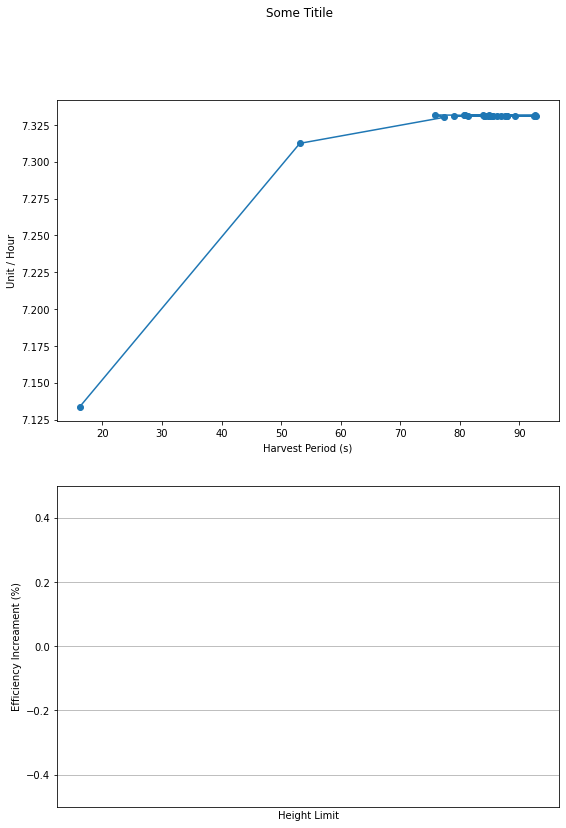

In [9]:
print(max_points)
max_points_x = list(point[0] for point in max_points)
max_points_y = list(point[1] for point in max_points)
length = len(max_points)
bonus_x = list(i+1.5 for i in range(length-1))
bonus_y = list((max_points[i+1][1] - max_points[i][1])/max_points[i][1]*100 for i in range(length-1))
print(bonus_y)

fig_points, [ax_points, ax_bonus] = plt.subplots(2)
fig_points.set_size_inches(9,13)
fig_points.set_facecolor('w')
fig_points.suptitle('Some Titile')

ax_points.plot(max_points_x,max_points_y,'o-')
ax_points.set_label('MAX VALUES')
ax_points.set_xlabel('Harvest Period (s)')
ax_points.set_ylabel('Unit / Hour')

ax_bonus.plot(bonus_x,bonus_y,'x-')
ax_bonus.set_label('BONUS (%)')
ax_bonus.set_xlabel('Height Limit')
ax_bonus.set_ylabel('Efficiency Increament (%)')
ax_bonus.set_xticks(list(i*2+1 for i in range(math.ceil(length/2)) ) )
#ax_bonus.minorticks_on()
ax_bonus.grid()
ax_bonus.set_xbound(70,95)
ax_bonus.set_ybound(-0.5,0.5)

#fig_points.legend()